In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/gdrive')
!cd /content/gdrive/MyDrive/UROP_Project

Mounted at /content/gdrive


In [ ]:
import requests
from bs4 import BeautifulSoup
import random
verbose = False
patent_documentation = []
MAXPAGE = 50
curr_page = 0
while True:
    HEADERS = {
        'user-agent': f'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.{random.randint(0, 9999)} Safari/537.{random.randint(0, 99)}',
        'referrer': 'https://google.com'
    }
    url = f'https://www.google.com/search?q=chair&tbm=pts&ei=aDYCYr7HB-WiseMP2aCE4AM&start={curr_page}&sa=N&ved=2ahUKEwi-m7mV5O_1AhVlUWwGHVkQATwQ8NMDegQIARBg&biw=1163&bih=554&dpr=1.65'
    soup = BeautifulSoup(requests.get(url, headers=HEADERS).content, 'lxml')
    patent_in_page = soup.findAll('cite')
    patent_lst = []
    for p in patent_in_page:
        patent_lst.append(p.text)
    patent_set = set(patent_lst)

    next_page = soup.find('span', attrs={'style':"display:block;margin-left:53px"})
    print(url)

    for p in patent_set:
        patent_soup = BeautifulSoup(requests.get(f'https://{p}', headers=HEADERS).content, 'lxml')
        title = patent_soup.find('h1')
        abstract = patent_soup.find('div', class_='abstract')
        claim_text = patent_soup.findAll('div', class_='claim-text')

        Patent_URL = f'https://{p}'
        Patent_Title = title.text.replace("\n", " ").replace(" - Google Patents", "") if title is not None else ''
        Patent_Abstract = abstract.text.replace("\n", " ") if abstract is not None else ''
        Patent_Claim = []

        for txt in claim_text:
            Patent_Claim.append(txt.text.replace("\n", " "))
        Patent_Claim = ''.join(Patent_Claim)
        if verbose:
            print(Patent_URL, Patent_Title)
            print(Patent_Abstract)
            print(Patent_Claim)
            print("----------------", "\n\n")

        patent_documentation.append({
            'TITLE': Patent_Title,
            'ABSTRACT': Patent_Abstract,
            'CLAIM': Patent_Claim,
            'URL': Patent_URL
        })

    if next_page is not None and int(curr_page/10) <= MAXPAGE:
        curr_page += 10
        print(f'Working on {int((curr_page)/10)}')
    else:
        break

df = pd.DataFrame(patent_documentation)
df.to_csv('Chair.csv')

!cp -r './Chair.csv' /content/gdrive/MyDrive/UROP_Project

In [ ]:
df_vib = pd.read_csv("/content/gdrive/My Drive/UROP_Project/Feedback.csv")
df_vib = df_vib[~df_vib['TITLE'].isnull() & ~df_vib['ABSTRACT'].isnull() & ~df_vib['CLAIM'].isnull()]
df_vib.drop(labels='Unnamed: 0', axis=1, inplace=True)
df_vib.head()
df_vib.to_csv('Feedback.csv')
!cp -r './Feedback.csv' /content/gdrive/MyDrive/UROP_Project

In [ ]:
import os
from pathlib import Path

str_path = "/content/gdrive/MyDrive/UROP_Project"
path = Path(str_path)
for files in os.listdir(path):
    if "csv" in files:
        df_vib = pd.read_csv(f"/content/gdrive/My Drive/UROP_Project/{files}")
        df_vib = df_vib[~df_vib['TITLE'].isnull() & ~df_vib['ABSTRACT'].isnull() & ~df_vib['CLAIM'].isnull()]
        df_vib = df_vib[df_vib['TITLE'].apply(lambda x: 'CN' not in x and 'DE' not in x and 'EP' not in x and 'KR' not in x)]
        df_vib.drop(labels='Unnamed: 0', axis=1, inplace=True)
        df_vib.head()
        df_vib.to_csv(f'{files}')

In [ ]:
target_files = ['Combining', 'Feedback', 'Preaction', 'Vibration']
#target_files = ['CompositeMaterial', 'Periodic', 'Oxidation', 'Inert']
li = []
for name in target_files:
    fname = name + '.csv'
    df = pd.read_csv(fname)
    df['CLASS'] = name
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
df = df.iloc[np.random.permutation(len(df))]
df.drop(labels='Unnamed: 0', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,TITLE,ABSTRACT,CLAIM,URL,CLASS
0,US6053487A - Fluid-filled vibration damping de...,A fluid-filled vibration damping device having...,1. A fluid-filled vibration damping device hav...,https://www.google.com/patents/US6053487,Vibration
1,US9285596B2 - Free-space combining of laser be...,A diode laser beam combining apparatus for pro...,1. A diode laser beam combining apparatus for ...,https://www.google.com/patents/US9285596,Combining
2,US5713832A - Massaging furniture with electric...,The present invention relates to a massaging d...,1. Furniture apparatus for a user to rest or s...,https://www.google.com/patents/US5713832,Vibration
3,US20040200899A1 - Automatic toll collection ar...,An automatic toll collection architecture and ...,1. An automatic toll collection system combin...,https://www.google.com/patents/US20040200899,Combining
4,US20120261944A1 - Vehicle Seal With Sensor Fee...,A seal is provided for a slide-out room of a r...,1. An apparatus for a slide-out room of a rec...,https://www.google.com/patents/US20120261944,Feedback


In [ ]:
np.random.seed(0)
li = []
for name in target_files:
    df_class = df[df['CLASS'] == name]['ABSTRACT']
    df_class_1 = df_class.iloc[np.random.permutation(min(len(df_class), 50))].reset_index(drop=True)

    df_class_2 = df_class.iloc[np.random.permutation(min(len(df_class), 50))].reset_index(drop=True)
    df_class = pd.concat([df_class_1, df_class_2], axis=1, ignore_index=True)
    df_class['Score'] = 1.0
    li.append(df_class)
df_same_class = pd.concat(li, axis=0, ignore_index=True)
df_same_class = df_same_class.iloc[np.random.permutation(len(df_same_class))]
#df_same_class.drop(labels='Unnamed: 0', axis=1, inplace=True)
df_same_class.reset_index(drop=True, inplace=True)

df_same_class.head()

,0,1,Score
0,"A shaft-sealing device includes a shaft tube, ...",A code combining soft handoff method is disclo...,1.0
1,This invention describes a device consisting o...,A telemedicine system to enable remote pre-dia...,1.0
2,An arithmetic unit for performing an arithmeti...,A light treatment apparatus includes a light s...,1.0
3,A fluid-filled vibration damping device having...,A hybrid controller for a mechanical system in...,1.0
4,Various ways of storing data in tabular form s...,Light beam splitting and combining system inte...,1.0


In [ ]:
li = []
for name_1 in target_files:
    df_class_1 = df[df['CLASS'] == name_1]['ABSTRACT']
    for name_2 in target_files:
        if name_1 is not name_2:
            df_class_2 = df[df['CLASS'] == name_2]['ABSTRACT']
            df_class_1 = df_class_1.iloc[np.random.permutation(min([len(df_class_1), len(df_class_2), 50]))].reset_index(drop=True)
            df_class_2 = df_class_2.iloc[np.random.permutation(min([len(df_class_2), len(df_class_1), 50]))].reset_index(drop=True)
            df_class = pd.concat([df_class_1, df_class_2], axis=1, ignore_index=True)
            df_class['Score'] = 0.0
            li.append(df_class)
df_diff_class = pd.concat(li, axis=0, ignore_index=True)
df_diff_class = df_diff_class.iloc[np.random.permutation(len(df_diff_class))]
#df_same_class.drop(labels='Unnamed: 0', axis=1, inplace=True)
df_diff_class.reset_index(drop=True, inplace=True)
df_diff_class.head()

,0,1,Score
0,The invention relates to a filter system that ...,In a packaging system where a pasty material i...,0.0
1,A vibration detector and method of measuring v...,An image reading system to easily obtain a des...,0.0
2,"A light weight vibrating tile setting tool, op...",A multiple redundant computer system includes ...,0.0
3,A fluid-filled vibration damping device having...,A methodology for assisting a user in a combin...,0.0
4,A vibration type floor sweeper comprising a mo...,The invention concerns an independent measurin...,0.0


In [ ]:
df_samples = pd.concat([df_same_class, df_diff_class], ignore_index=True)
df_samples = df_samples.iloc[np.random.permutation(len(df_samples))]
df_samples.reset_index(drop=True, inplace=True)

df_samples.head()

,0,1,Score
0,An improved process is provided for the produc...,An assembly for testing a head gimbal assembly...,0.0
1,A hand-held vibration-damped striking tool has...,The present invention relates to a device and...,0.0
2,A lighting feedback control system for applyin...,A method and a device combine auxiliary and ma...,0.0
3,A contour vibration mode piezoelectric resonat...,The invention concerns processes and solutions...,0.0
4,An assembly of probes (1000) measures both the...,A linear vibration motor comprising a movable ...,0.0


In [ ]:
!pip install random_user_agent
!pip install nltk
!pip install transformers
!pip install apache_beam
!pip install sentence-transformers
!pip install keybert
!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]
!pip install keybert[all]

     |████████████████████████████████| 8.2 MB 17.8 MB/s 
     |████████████████████████████████| 3.5 MB 26.7 MB/s 
     |████████████████████████████████| 895 kB 39.2 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 
     |████████████████████████████████| 6.8 MB 46.9 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 10.1 MB 22.4 MB/s 
     |████████████████████████████████| 245 kB 45.6 MB/s 
     |████████████████████████████████| 151 kB 74.5 MB/s 
     |████████████████████████████████| 508 kB 33.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.3 MB 50.7 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 64.0 MB/s 
  Created wheel for dill: filename=dill-0.3.

     |████████████████████████████████| 78 kB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 46.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=aad6a966bccb65626d27269251b3fb22b52f26823b6416df0e56d395d49646f7
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
     |████████████████████████████████| 217 kB 32.5 MB/s 
     |████████████████████████████████| 51 kB 5.4 MB/s 
  Created wheel for keybert: filename=keybert-0.5.0-py3-none-any.whl size=20491 sha256=6f28fa828184d2742abef90156c2fad64c934c23a97ac43aaed27d8158ff77e5
  Stored in directory: /root/.cache/pip/wheels/99/1f/3f/590d2997adbb2d0e1f82e8ee05d42d6910e92c3ed283015ff8
Successfully built keybert
     |████████████████████████████████| 1.3 MB 28.2 MB/s 
     |████████████████████████████████| 776.7 MB 3.8 kB/s 
     |████████████████████████████████| 

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    """
    This function takes as input a text on which several
    NLTK algorithms will be applied in order to preprocess it
    """
    tokens = word_tokenize(text)
    # Remove the punctuations
    tokens = [word for word in tokens if word.isalpha()]
    # Lower the tokens
    tokens = [word.lower() for word in tokens]
    # Remove stopword
    tokens = [word for word in tokens if not word in stopwords.words("english")]
    # Lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos = "v") for word in tokens]
    tokens = [lemma.lemmatize(word, pos = "n") for word in tokens]
    return tokens

In [ ]:
df_samples['Cleaned_0'] = df_samples[0].apply(lambda x: clean_text(x))
df_samples['Cleaned_1'] = df_samples[1].apply(lambda x: clean_text(x))

In [ ]:
df_samples['Joined_0'] = df_samples['Cleaned_0'].apply(lambda x: " ".join(x))
df_samples['Joined_1'] = df_samples['Cleaned_1'].apply(lambda x: " ".join(x))

df_samples.head()

,0,1,Score,Cleaned_0,Cleaned_1,Joined_0,Joined_1
0,A new method for the preliminary treatment of ...,An apparatus and method are disclosed in which...,0.0,"[new, method, preliminary, treatment, raw, mat...","[apparatus, method, disclose, ultrasonic, vibr...",new method preliminary treatment raw material ...,apparatus method disclose ultrasonic vibration...
1,A holder is used while attached to a chassis o...,Method and apparatus for continuous fractionat...,0.0,"[holder, use, attach, chassis, vibration, gene...","[method, apparatus, continuous, fractionation,...",holder use attach chassis vibration generator ...,method apparatus continuous fractionation tall...
2,An implanted device such as cochlear implant h...,An apparatus and method for combining light si...,0.0,"[implant, device, cochlear, implant, electrode...","[apparatus, method, combine, light, signal, ca...",implant device cochlear implant electrode prov...,apparatus method combine light signal carry pl...
3,ABSTRACT OF THE DISCLOSURE TORSION...,The disclosed device sandwiches and laminates ...,0.0,"[abstract, disclosure, torsional, vibration, a...","[disclose, device, sandwich, laminate, interme...",abstract disclosure torsional vibration absorb...,disclose device sandwich laminate intermediate...
4,Wavelength combining for nonlinear frequency c...,A vibration damper for detecting vibrations of...,0.0,"[wavelength, combine, nonlinear, frequency, co...","[vibration, damper, detect, vibration, break, ...",wavelength combine nonlinear frequency convers...,vibration damper detect vibration break pad vi...


In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, losses, models
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers.cross_encoder.evaluation import CESoftmaxAccuracyEvaluator
from sentence_transformers.cross_encoder.evaluation import CECorrelationEvaluator
from torch.utils.data import DataLoader
from torch import nn
import math
import datetime

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

#model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model], device='cuda')
model = CrossEncoder('cross-encoder/stsb-distilroberta-base')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/148 [00:00<?, ?B/s]

In [ ]:
train_examples = []

num_epochs = 25
train_batch_size = 8

for idx, row in df_samples.iterrows():
    train_examples.append(InputExample(texts=[row['Joined_0'], row['Joined_1']], label=row['Score']))
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=train_batch_size)
train_loss = losses.CosineSimilarityLoss(model)

warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
model_save_path = '/content/gdrive/MyDrive/UROP_Project/ModelSave2/'

evaluator = CECorrelationEvaluator.from_input_examples(train_examples, name='sts-dev')

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
#model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=num_epochs, warmup_steps=warmup_steps, output_path=model_save_path)
num_epochs = 10
model.fit(train_dataloader=train_dataloader,
          evaluator=evaluator,
          epochs=num_epochs,
          warmup_steps=warmup_steps,
          output_path=model_save_path)


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

Iteration:   0%|          | 0/84 [00:00<?, ?it/s]

In [ ]:
evaluator(model)

0.30184565530932983

In [ ]:
predict_test = model.predict([[row['Joined_0'], row['Joined_1']] for idx, row in df_samples.iterrows()],
                             batch_size=16,
                             show_progress_bar=True)
print(predict_test)

In [ ]:
def threshold(x):
    if x >= 0.5:
        return 1
    else:
        return 0

score_test = np.fromiter(map(threshold, predict_test), dtype='int64')
print(score_test)

[1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1
 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
real_score = np.asarray(df_samples['Score'], dtype='int64')
print(real_score)

[1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 

In [ ]:
TP_test = sum(real_score == score_test)
print(TP_test)

338


In [ ]:
len(real_score)

512

In [ ]:
FP_sum = 0
FN_sum = 0

for i in range(len(real_score)):
    if score_test[i] == 1 and real_score[i] == 0:
        FP_sum += 1
    if score_test[i] == 0 and real_score[i] == 1:
        FN_sum += 1

precision_test = float(TP_test)/float(TP_test + FP_sum)
recall_test = float(TP_test)/float(TP_test + FN_sum)
F1_test = 2*(recall_test*precision_test)/(recall_test + precision_test)

print(f'Precision_test: {precision_test}\nrecall test: {recall_test}\nF1: {F1_test}')


Precision_test: 0.7544642857142857
recall test: 0.8407960199004975
F1: 0.7952941176470588


In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, losses, models
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers.cross_encoder.evaluation import CESoftmaxAccuracyEvaluator
from sentence_transformers.cross_encoder.evaluation import CECorrelationEvaluator
from torch.utils.data import DataLoader
from torch import nn
import math
import datetime
model_save_path = '/content/gdrive/MyDrive/UROP_Project/Output/'+ 'model'
model = CrossEncoder(model_save_path)

In [ ]:
predict_test = model.predict([[row['Joined_0'], row['Joined_1']] for idx, row in df_samples.iterrows()],
                             batch_size=16,
                             show_progress_bar=True)
def threshold(x):
    if x >= 0.5:
        return 1
    else:
        return 0

score_test = np.fromiter(map(threshold, predict_test), dtype='int64')

real_score = np.asarray(df_samples['Score'], dtype='int64')
TP_test = sum(real_score == score_test)
FP_sum = 0
FN_sum = 0

for i in range(len(real_score)):
    if score_test[i] == 1 and real_score[i] == 0:
        FP_sum += 1
    if score_test[i] == 0 and real_score[i] == 1:
        FN_sum += 1

precision_test = float(TP_test)/float(TP_test + FP_sum)
recall_test = float(TP_test)/float(TP_test + FN_sum)
F1_test = 2*(recall_test*precision_test)/(recall_test + precision_test)

print(f'Precision_test: {precision_test}\nrecall test: {recall_test}\nF1: {F1_test}')

Batches:   0%|          | 0/42 [00:00<?, ?it/s]

Precision_test: 1.0
recall test: 0.718562874251497
F1: 0.8362369337979094


In [ ]:
s1 = "To weld with stable quality without depending upon a shape of a work piece by always forming a rectangular shape for connecting a plurality of fixed centers to a moving center in a parallelogram, and limiting movement of an operating plate to an infinitesimal circular motion. SOLUTION: Spindles 17a are rotatably mounted at a housing 6 via bearings 19 so that their centers are fixed. Meanwhile, eccentric shafts 17b are rotatably mounted at an operating plate 7 via bearings 20 so that their centers are moving centers. Two rotary shafts 17 are integrated in directions of the shafts 17b so that a distance between the two shafts 17a is the same as a distance between the two shafts 17b in such a manner that a rectangular shape for connecting the fixed centers to the moving centers is always in a parallelogram. And, a parallel moving mechanism is constituted by the housing 6, plate 7 and the spindles 17a, the shafts 17b of the shafts 17. Thus, movement of the plate 7 is limited to an infinitesimal circular motion. Thus, even if a way of operating a stress becomes irregular according to the shape of a work piece, welding of stable quality can be performed."
s2 = "The utility model provides a vibration wheel of a vibration roller, which comprises a wheel rim (1), a spoke plate, a driving device (30), a left eccentric block (41), an intermediate eccentric block (42), a right eccentric block (43), an internal shaft (10) and an external shaft (20). The intermediate eccentric block is arranged on one of the internal shaft and the external shaft. The left and right eccentric blocks are arranged on the other one of the internal shaft and the external shaft. The internal and external shafts are in transmission connection with the driving device. The vibration wheel also comprises a first adjusting seat (101), a second adjusting seat (102) and a connecting device. The first adjusting seat is arranged on the internal shaft and the second adjusting seat is arranged on the external shaft. The first and second adjusting seats capable of relatively rotating at a plurality of angles are connected with each other via the connecting device. The utility model also provides a vibration roller equipped with the above vibration wheel. The amplitude of the vibration roller can be adjusted through the cooperation of the two adjusting seats with the internal and external shafts. The vibration roller equipped with the above vibration wheel also has the advantages of simple and compact structure, convenient operation and greatly reduced product manufacturing cost."
s3 = "A method to distribute periodic task workload in an information handling system includes distributing processing tasks using a tick interval. A first execution trigger in a service variable may be set at a first multiple of a predetermined tick interval. A second execution trigger may be set at a second multiple of the predetermined tick interval. The second multiple may be greater than and staggered from the first multiple, such that the first and second execution triggers may not both be set during the same tick interval. The service variable may be interrogated at the predetermined tick interval. A first processing task associated with the first execution trigger may be executed in response to detecting that the first execution trigger has been set. A second processing task associated with the second execution trigger may be executed in response to detecting that the second execution trigger has been set."
s4 = "The invention relates to a method for improving the time performance of periodic timers in a real-time operating system. The current timer management scheme is to dynamically insert a new failure time when failure timers perform update operation, thus the efficiency is low in the aspect of realizing the periodic task model. The method of the invention comprises the following steps: firstly establishing a timer scheduler, wherein each timer scheduling item comprises the three parts of timer failure time, associated task link list and task number of the task link list; secondly initializing the timers, inputting the parameters of N-numbered timers in an array, calculating the superperiod H of the N-numbered timers; and finally updating the timers. The invention divides the timer management into two stages of timer initialization and timer updating, thus reducing the operation cost of the timer. By using the method of the invention, the time cost and space cost for the management of the timer are less, thus the method is very suitable for the microkernel embedded real-time operating system."
model.predict([s1, s4], batch_size=1)

0.015558935

In [ ]:
TRIZ = {'Segmentation': 'Segmentation',
        'Taking out': 'Seperating',
        'Local quality': 'Adaptation',
        'Asymmetry': 'Asymmetry',
        'Merging': 'Merging',
        'Universality': 'Combined functions',
        'Nested doll': 'Inside and Cavity',
        'Anti-weight': 'Lightened and Buoyancy and Aerodynamic',
        'Preliminary Anti-action': 'Control harm',
        'Preliminary action': 'Preemptive',
        'Beforehand Cushioning': 'Precaution',
        'Equipotentiality': 'Change the environment',
        'The other way round': 'Inverse and upside down',
        'Curvature': 'Curvature',
        'Dynamics': 'Dynamics',
        'Partial Actions': 'Less force',
        'Excessive Actions': 'More force',
        'Another dimension': 'Multidimension',
        'Mechanical Vibration': 'Vibration',
        'Periodic Action': 'Periodic and Pulsating',
        'Continuity of useful action': 'Continuous',
        'Skipping': 'Skip',
        'Blessing in disguise': 'Negative to positive',
        'Feedback': 'Feedback',
        'Intermediary': 'Intermediary',
        'Self-service': 'Auxiliary functions',
        'Copying': 'Copying',
        'Cheap short-living objects': 'Cheap and Disposable',
        'Mechanics Substitution': 'Substitution',
        'Pneumatics and Hydraulics': 'Pneumatics and Hydraulics',
        'Flexible shells and Thin Films': 'Flexible and Thin',
        'Porous Material': 'Porous',
        'Color changes': 'Color changes',
        'Homogeneity': 'Homogeneity',
        'Discarding or Recovering': 'Discarding or Recovering',
        'Parameter Changes': 'Parameter changes',
        'Phase transitions': 'Phase transitions',
        'Thermal expansion': 'Thermal expansion',
        'Strong oxidants': 'Strong Oxidants',
        'Inert atmosphere': 'Inert atmosphere',
        'Composite materials':'Composite materials'}

labels = list(TRIZ.values())


f'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.{random.randint(0, 9999)} Safari/537.{random.randint(0, 99)}'

In [ ]:
!pip install git+https://github.com/howie6879/magic_google.git
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.proxy import ProxyType, Proxy

  Cloning https://github.com/howie6879/magic_google.git to /tmp/pip-req-build-hsv8r005
  Running command git clone -q https://github.com/howie6879/magic_google.git /tmp/pip-req-build-hsv8r005
     |████████████████████████████████| 263 kB 32.6 MB/s 
  Created wheel for magic-google: filename=magic_google-0.3.0-py3-none-any.whl size=5448 sha256=dedde9022f0cbaa615cc3587eda2948b31842f37ee1a5ea3b2e4adaa4fb6a59b
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzg5tn5h/wheels/b4/2e/69/05c0631db9e0cdae6fe63c933bf555baad994be30b6f52aff0
Successfully built magic-google
     |████████████████████████████████| 958 kB 25.7 MB/s 
     |████████████████████████████████| 138 kB 68.8 MB/s 
     |████████████████████████████████| 356 kB 67.2 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 3.6 MB 49.3 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uni

In [ ]:
import time
import pandas as pd
from random_user_agent.user_agent import UserAgent
from random_user_agent.params import SoftwareName, OperatingSystem
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import numpy as np
import torch
from sentence_transformers import SentenceTransformer, util

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
software_names = [SoftwareName.CHROME.value]
operating_systems = [OperatingSystem.WINDOWS.value, OperatingSystem.LINUX.value]
user_agent_rotator = UserAgent(software_names=software_names, operating_systems=operating_systems, limit=100)
user_agent = user_agent_rotator.get_random_user_agent()

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('window-size=1420,1080')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument(f'user-agent={user_agent}')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
driver.get("https://www.lens.org/")
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
driver.get_screenshot_as_file("screenshot.png")

delay = 10
search_option = "Wind Turbine"
searchBox = WebDriverWait(driver, delay).until(expected_conditions.visibility_of_element_located((By.XPATH, '//label[@class="input"]/input')))
searchBox.send_keys(search_option)
submitBtn = driver.find_element_by_class_name("btn.btn-feat")
submitBtn.click()

time.sleep(5)
driver.get_screenshot_as_file("screenshot.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if __name__ == '__main__':


True

In [ ]:
patent_link = []

select_display = WebDriverWait(driver, delay).until(expected_conditions.presence_of_element_located((By.XPATH, "//label[@class='select select-sm']/select")))
select_display = Select(select_display)
select_display.select_by_value("number:100")

#searchResults = WebDriverWait(driver, delay).until(expected_conditions.presence_of_all_elements_located((By.CLASS_NAME, "div-table-results-row")))

for link in WebDriverWait(driver, delay*3).until(expected_conditions.presence_of_all_elements_located((By.XPATH, "//div[@class='listing-with-sidebar']/h3/a"))):
    href = link.get_attribute('href')
    print(href)
    patent_link.append(href)

In [ ]:
time_span = 10

for patent in patent_link:
    driver.get(patent)
    abstract = WebDriverWait(driver, delay).until(expected_conditions.presence_of_element_located((By.CLASS_NAME, "ng-binding.ng-scope")))
    print(abstract.text)
    claim = WebDriverWait(driver, delay).until(expected_conditions.presence_of_element_located((By.CLASS_NAME, "ng-binding.ng-scope")))
    break

In [ ]:
df_1 = pd.read_csv("/content/gdrive/MyDrive/UROP_Project/Wind_Turbine.csv")
df_1.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_1 = df_1[df_1['TITLE'].apply(lambda x: 'CN' not in x and 'DE' not in x and 'EP' not in x and 'KR' not in x)]
df_2 = pd.read_csv("/content/gdrive/MyDrive/UROP_Project/Boat_Propeller.csv")
df_2.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_2 = df_2[df_2['TITLE'].apply(lambda x: 'CN' not in x and 'DE' not in x and 'EP' not in x and 'KR' not in x)]
df_3 = pd.read_csv("/content/gdrive/MyDrive/UROP_Project/Microfilter.csv")
df_3.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_3 = df_3[df_3['TITLE'].apply(lambda x: 'CN' not in x and 'DE' not in x and 'EP' not in x and 'KR' not in x)]
df = [df_1, df_2, df_3]


In [ ]:
df_1_sub = df_1.sample(50)
df_2_sub = df_2.sample(50)
df_3_sub = df_3.sample(50)
df_train = pd.concat(objs=[df_1_sub, df_2_sub, df_3_sub], axis=0, ignore_index=True)
df_train = df_train.iloc[np.random.permutation(len(df_train))]
df_train.reset_index(drop=True, inplace=True)

df_train.head(10)

In [ ]:
all_sentences = []
with open("/content/gdrive/MyDrive/UROP_Project/Test/All_sentences.txt", "w") as f:
    for i in range(len(df_train)):
        claim = df_train.iloc[i, 2]
        sentences = sent_tokenize(claim)
        for sent in sentences:
            if len(sent) > 5:
                all_sentences.append(sent)
                f.write(sent +"\n")

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")





In [ ]:
label_sub = labels
all_sent = []
for sent in sent_tokenize(df.iloc[0,2]):
    if len(sent) < 5:
        continue
    all_sent.append(sent)


history = classifier(all_sent, label_sub, device=0)


In [ ]:
for j in history:
    print(j['sequence'])
    print(j['labels'][0])
    print(j['scores'][0])

A wind farm, the wind farm comprising: A first wind turbine system having a first doubly fed induction generator, the first doubly fed induction generator having a rotor and a stator; A second wind turbine system having a second doubly fed induction generator, the second doubly fed induction generator having a rotor and a stator; and a control system, the control system configured to detect a reduced wind speed at the first doubly fed induction generator; wherein in response to detecting the reduced wind speed at the first doubly fed induction generator, the control system is configured to control the first doubly fed induction generator to reduce a reactive power output of the first doubly fed induction generator and to reduce the rotational speed of the rotor of the first doubly fed induction generator to increase power output of the first doubly fed induction generator, wherein the control system further configured to control the second doubly fed induction generator to increase a r

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pre_df = pd.DataFrame(columns=['Sentence', 'Label', 'Score'])
MAX_ROW = 25
BATCH_SIZE = 5
count = 0
for i in range(MAX_ROW):
    for sent in sent_tokenize(df.iloc[i,2]):
        if len(sent) < 5:
            continue

        history = classifier(sent, labels, device=device)
        print(history['sequence'])
        print(history['labels'][0])
        print(history['scores'][0])
        pre_df.loc[count] = [history['sequence'], history['labels'][0], history['scores'][0]]
        count += 1
        if len(pre_df) > 3:
            break
    if len(pre_df) > 3:
        break

pre_df.head()

In [ ]:
pre_df = pd.DataFrame(columns=['Sentence', 'Label', 'Score'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
for count, sent in enumerate(all_sentences):
    history = classifier(sent, labels, device=device)
    print(history['sequence'])
    print(history['labels'][0])
    print(history['scores'][0])
    pre_df.loc[count] = [history['sequence'], history['labels'][0], history['scores'][0]]

In [ ]:
model = SentenceTransformer('stsb-roberta-large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
TRIZ_extended = {
    'Segmentation': ['Segment object', 'Dismountable design', 'Segment to microlevel', 'Segment function', 'Segment process'],
    'Trimming': ['Take out disturbing parts', 'Trim components', 'Trim functions', 'Trim process steps', 'Extract useful element'],
    'Local quality': ['Non-uniform object', 'Non-uniform environment', 'Different functions', 'Optimal conditions', 'Opposite properties'],
    'Asymmetry': ['Asymmetry', 'Enhance asymmetry', 'Back to symmetry'],
    'Combining': ['Combine similar objects', 'Combine functions', 'Combine different properties', 'Combine complementary properties', 'Combine opposing properties'],
    'Universality': ['Multifunctioning object', 'Multifunction process'],
    'Nesting': [Nested objects; 7(b) Passing through cavities; 7(c) Telescopic systems.],
    'Anti-weight': ['Use counterweight', 'Buoyancy', 'Aero- or hydrodynamics', 'Use gravitational or centrifugal forces'],
    'Prior Counteraction of harm': [Counter harm in advance; 9(b) Anti-stress; 9(c) Cooling in advance; 9(d) Rigid construction],
    'Prior useful action': ['Prior useful function', 'Pre-arrange objects', 'Prior process step'],
    'Preventive measure': [ Safety cushion; 11(b) Preventive measures],
    'Equipotentiality': [Keep altitude; 12(b) Equipotentiality; 12(c) Avoid fluctuations],
    'The other way round': [ Inversed action; 13(b) Make fixed parts to movable; 13(c) Upside down; 13(d) Reversed sequence; 13(e) Invert environment],
    'Curvature': ['Ball-shaped forms', 'Spheres and cylinders', 'Rotary motion', 'Swirling motion', 'Centrifugal forces'],
    'Dynamics': ['Optimal performance', 'Adaptive object', 'Adaptive process', 'Flexible elements', 'Change statics to dynamics'],
    'Partial or Excessive Actions': [One step back from ideal; 16(b) Optimal substance amount; 16(c) Optimal action.],
    'Another dimension': [Multi-dimensional form; 17(b) Miniaturization; 17(c) Multi-layered structure; 17(d) Tilt object; 17(e) 3D interaction ],
    'Mechanical Vibration': [ Oscillate object; 18(b) Ultrasound; 18(c) Resonance; 18(d) Piezo-electric vibrators; 18(e) Ultrasound with other fields.],
    'Periodic Action': [Periodic action; 19(b) Change frequency; 19(c) Use pauses; 19(d) Match frequencies; 19(e) Separate in time],
    'Continuity of useful action': [Continuous process; 20(b) Operate at full load; 20(c) Eliminate idle work.],
    'Skipping': [Skip hazardous operations; 21(b) Boost the process.],
    'Blessing in disguise': [Utilize harm; 22(b) Remove harm with harm; 22(c) Amplify harm to avoid it],
    'Feedback': [ Introduce feedback; 23(b) Enhance feedback; 23(c) Automation; 23(d) Data processing],
    'Intermediary': [Intermediate object; 24(b) Temporary mediator; 24(c) Intermediary process],
    'Self-service': [Object serves itself; 25(b) Utilize waste resources; 25(c) Use environmental resources],
    'Copying': [ Simple copies; 26(b) Optical copies; 26(c) Invisible copies; 26(d) Digital models; 26(e) Virtual reality],
    'Cheap short-living objects': [Short-living objects; 27(b) Multiple cheap objects; 27(c) One-way objects; 27(d) Create objects from resources.],
    'Mechanics Substitution': ['Use electromagnetics', 'Optical systems', 'Acoustic system', 'Chemical and biosystems', 'Thermal Systems'],
    'Pneumatics and Hydraulics':  ['Gaseous or liquid flows', 'Gas or liquid under pressure', 'Use vacuum', 'Fluidization', 'Heat transfer and exchange'],
    'Flexible shells and Thin Films': [Flexible shells or films; 30(b) Flexible isolation; 30(c) Piezoelectric foils; 30(d) Use brushes; 30(e) Use membranes.],
    'Porous Material': [ Add porous elements; 31(b) Fill pores with substance; 31(c) Use capillary effects; 31(d) Physical effects and porosity; 31(e) Structured porosity.],
    'Color changes': [Change colour; 32(b) Change transparency; 32(c) Coloured additives; 32(d) Use tracer.],
    'Homogeneity': [Similar materials; 33(b) Similar properties; 33(c) Uniform properties],
    'Discarding or Recovering': [Discard useless parts; 34(b) Restore parts; 34 (c) Create parts on time and on site.],
    'Parameter Changes': [Change aggregate state; 35(b) Change concentration; 35(c) Change physical properties; 35(d) Change temperature; 35(e) Change chemical properties],
    'Phase transitions': [Gas liquid solid plasma],
    'Thermal expansion': [Thermal expansion; 37(b) Bi-metals; 37(c) Heat shrinking; 37(d) Shape memory],
    'Strong oxidants': [Oxygen-enriched air; 38(b) Use pure oxygen; 38(c) Use ionized oxygen; 38(d) Use ozone; 38(e) Strong oxidants],
    'Inert atmosphere': ['Inert environment', 'Inert atmosphere process', 'Process in vacuum', 'Inert coatings or additives', 'Use foams'],
    'Composite materials': ['Composite materials', 'Use anisotropic properties', 'Additives in composites', 'Composite microstructure', 'Combine different aggregate states']
}

In [ ]:
TRIZ_extended = {
    'Mechanics Substitution': ['Use electromagnetics', 'Optical systems', 'Acoustic system', 'Chemical and biosystems', 'Thermal Systems'],
    'Pneumatics and Hydraulics':  ['Gaseous or liquid flows', 'Gas or liquid under pressure', 'Use vacuum', 'Fluidization', 'Heat transfer and exchange'],
    'Segmentation': ['Segment object', 'Dismountable design', 'Segment to microlevel', 'Segment function', 'Segment process'],
    'Trimming': ['Take out disturbing parts', 'Trim components', 'Trim functions', 'Trim process steps', 'Extract useful element'],
    'Local quality': ['Non-uniform object', 'Non-uniform environment', 'Different functions', 'Optimal conditions', 'Opposite properties'],
    'Asymmetry': ['Asymmetry', 'Enhance asymmetry', 'Back to symmetry'],
    'Combining': ['Combine similar objects', 'Combine functions', 'Combine different properties', 'Combine complementary properties', 'Combine opposing properties'],
    'Universality': ['Multifunctioning object', 'Multifunction process'],
    'Prior useful action': ['Prior useful function', 'Pre-arrange objects', 'Prior process step'],
    'Inert atmosphere': ['Inert environment', 'Inert atmosphere process', 'Process in vacuum', 'Inert coatings or additives', 'Use foams'],
    'Composite materials': ['Composite materials', 'Use anisotropic properties', 'Additives in composites', 'Composite microstructure', 'Combine different aggregate states'],
    'Curvature': ['Ball-shaped forms', 'Spheres and cylinders', 'Rotary motion', 'Swirling motion', 'Centrifugal forces'],
    'Dynamics': ['Optimal performance', 'Adaptive object', 'Adaptive process', 'Flexible elements', 'Change statics to dynamics'],
}

In [ ]:
embedding1 = model.encode(all_sentences[0], convert_to_tensor=True)
embedding2 = model.encode(all_sentences[1], convert_to_tensor=True)
# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print("Sentence 1:", all_sentences[0])
print("Sentence 2:", all_sentences[1])
print("Similarity score:", cosine_scores.item())

Sentence 1: A steerable propeller unit for watercraft having an inboard mounted engine, a drive shaft extending rearwardly from the craft for driving a propeller normally removably affixed thereto and an inboard steering control means, comprising a coupling member affixed to said drive shaft, said coupling member including an adapter for fitting on said drive shaft in place of said propeller, first key means locking said adapter to said drive shaft for rotation therewith, a tubular sleeve adapted to fit over and be releasably secured to said adapter, and a second key means locking said tubular sleeve to said adapter for rotation therewith, universal joint means connected to said coupling member, a propeller shaft extending from said universal joint means, a bearing housing within which said propeller shaft is journaled for rotation, a propeller removably affixed to said propeller shaft, a rudder arm affixed to said bearing housing and supporting said bearing housing for a swinging move

In [ ]:
data_compile = []
for sentence in all_sentences[0:10]:
    embedding1 = model.encode(sentence, convert_to_tensor=True)
    curr_sent = {}
    curr_sent['Sentence'] = sentence
    for index, (key, values) in enumerate(TRIZ_extended.items()):
        max = -99
        for v in values:
            embedding2 = model.encode(v, convert_to_tensor=True)
            cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
            if cosine_scores > max:
                max = cosine_scores
        curr_sent[key] = max.item()
    data_compile.append(curr_sent)

df_sq = pd.DataFrame(data_compile)



In [ ]:
df_sq.head()

In [ ]:
!pip install spaCy
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
all_post_sentences = []
for sentence in all_sentences:
    doc = nlp(sentence)
    processed_sent = []
    for token in doc:
        if token.pos_ == 'VERB' or token.pos_ == 'ADV':
            if token.text != 'said' and token.text != 'having' and token.text != 'means' and token.text != 'whereby' and token.text != 'claimed' and token.text != 'wherein':
                #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
                #        token.shape_, token.is_alpha, token.is_stop, token.has_vector, token.vector_norm, token.is_oov)
                processed_sent.append(token.text)
    if len(processed_sent) <= 3:
        continue
    post_pro_sent = " ".join(processed_sent)
    all_post_sentences.append(post_pro_sent)


In [ ]:
data_compile = []
for sentence in all_sentences[10:20]:

    embedding1 = model.encode(sentence, convert_to_tensor=True)
    curr_sent = {}
    curr_sent['Sentence'] = sentence
    for index, (key, values) in enumerate(TRIZ_extended.items()):
        max = -99
        for v in values:
            embedding2 = model.encode(v, convert_to_tensor=True)
            cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
            if cosine_scores > max:
                max = cosine_scores
        curr_sent[key] = max.item()
    data_compile.append(curr_sent)

df_sqp = pd.DataFrame(data_compile)


In [ ]:
df_sqp = pd.DataFrame(data_compile)

In [ ]:
df_sqp

,Sentence,Mechanics Substitution,Pneumatics and Hydraulics,Segmentation,Trimming,Local quality,Asymmetry,Combining,Universality,Prior useful action,Inert atmosphere,Composite materials,Curvature,Dynamics
0,A steerable propeller unit as claimed in claim...,0.263253,0.235358,0.204257,0.185396,0.119558,0.207566,0.238299,0.195901,0.244698,0.249373,0.258764,0.265019,0.251604
1,"Method for filtering beer, comprising guiding ...",0.260678,0.335455,0.209129,0.191671,0.154854,0.121101,0.127851,0.089486,0.382287,0.258670,0.174350,0.208981,0.253978
2,"Method according to claim 1, and during the sh...",0.253537,0.374807,0.191366,0.164448,0.127441,0.191164,0.260423,0.164834,0.367796,0.324669,0.293667,0.356170,0.384336
3,"Method according to claim 2, and modulating th...",0.399490,0.232646,0.402668,0.297549,0.284192,0.370238,0.334434,0.485503,0.312887,0.361751,0.411065,0.277104,0.387441
4,"Method according to claim 3, wherein the vibra...",0.366471,0.325693,0.278315,0.302995,0.290842,0.310183,0.278163,0.440490,0.281566,0.410378,0.395908,0.415449,0.498536
5,"Method according to claim 3, and modulating th...",0.324395,0.255878,0.293650,0.379968,0.236288,0.280752,0.231455,0.356952,0.290537,0.299870,0.284956,0.318014,0.332206
6,"Method according to claim 3, wherein the frequ...",0.330976,0.325190,0.110185,0.242943,0.155051,0.270023,0.335396,0.330808,0.280958,0.307969,0.233237,0.375047,0.274903
7,"Method according to claim 3, wherein the lower...",0.289039,0.365693,0.166676,0.107571,0.138212,0.258133,0.321664,0.226515,0.188417,0.302699,0.262566,0.367766,0.281746
8,"Method according to claim 3, wherein the diffe...",0.220587,0.213090,0.195248,0.164316,0.268201,0.242609,0.246807,0.249621,0.194828,0.261910,0.188189,0.289745,0.210692
9,"Method according to claim 1, wherein the nonfi...",0.311726,0.349100,0.189683,0.348196,0.288193,0.204210,0.299945,0.247251,0.358371,0.519778,0.261088,0.287513,0.237450


In [ ]:
df_sqp.iloc[3,0]

'Method according to claim 2, and modulating the vibration frequency of the vibration element within a frequency range between a lower frequency and an upper frequency.'

In [ ]:

LDA_sents = pd.Series(df_vib['CLAIM'])
import re
LDA_sents.apply(lambda x: re.sub('[,\.!?]', '', x))
LDA_sents.apply(lambda x: x.lower())

LDA_sents

0      1. A system for providing mechanical vibration...
1       1. A body-felt vibration system which compris...
2      1. A wrist watch with a vibration function com...
3      1. In a method of isolating a load from a sour...
4       1. A hybrid vibration-based power generator c...
                             ...                        
146    1. A vibrating tile setting tool adapted and c...
147    1. An energy harvester comprising: an energy c...
148    1. A lathe comprising: a base; a driven main s...
149    1 . Nabenteil (102), insbesondere für einen Dr...
150    Drehschwingungstilger für Kolbenmotoren, insbe...
Name: CLAIM, Length: 151, dtype: object

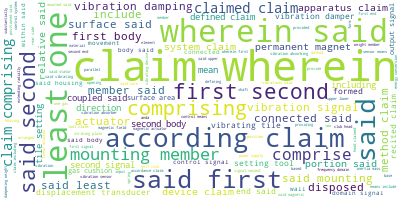

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(LDA_sents.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'claim', 'first', 'one', 'second', 'wherein', 'whereby', 'said', 'according', 'comprising', 'mean', 'means'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = LDA_sents.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['system', 'providing', 'mechanical', 'vibrations', 'distance', 'vibrating', 'transducer', 'system', 'coupling', 'housing', 'vibrating', 'transducer', 'least', 'remote', 'vibrating', 'unit', 'remote', 'vibrating', 'unit', 'comprises', 'vibration', 'pads', 'operatively', 'coupled', 'vibration', 'conducting', 'element', 'vibration', 'transducer', 'selectively']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 4), (25, 5), (26, 2), (27, 7), (28, 3), (29, 5)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"vibration" + 0.013*"damper" + 0.012*"part" + 0.009*"member" + '
  '0.009*"mounting" + 0.008*"mass" + 0.008*"plurality" + 0.008*"least" + '
  '0.007*"flange" + 0.007*"body"'),
 (1,
  '0.024*"vibration" + 0.014*"vibrating" + 0.013*"frequency" + 0.013*"motor" + '
  '0.011*"tile" + 0.011*"system" + 0.010*"least" + 0.010*"structure" + '
  '0.009*"tool" + 0.009*"device"'),
 (2,
  '0.013*"vibration" + 0.010*"signal" + 0.010*"unit" + 0.008*"frequency" + '
  '0.008*"housing" + 0.008*"system" + 0.007*"assembly" + 0.007*"plurality" + '
  '0.007*"signals" + 0.006*"least"'),
 (3,
  '0.046*"vibration" + 0.011*"portion" + 0.010*"signal" + 0.009*"mass" + '
  '0.008*"device" + 0.008*"damping" + 0.008*"body" + 0.007*"end" + '
  '0.006*"member" + 0.006*"method"'),
 (4,
  '0.021*"body" + 0.021*"mounting" + 0.016*"hull" + 0.016*"member" + '
  '0.014*"tool" + 0.012*"vibration" + 0.012*"magnetic" + 0.011*"relative" + '
  '0.011*"surface" + 0.010*"element"'),
 (5,
  '0.019*"vibration" + 0.019*"

In [ ]:
df_vib = pd.read_csv("Vibration.csv")
df_vib['Cleaned_Text'] = df_vib['ABSTRACT'].apply(lambda x: clean_text(x))
df_vib['Cleaned_Text'] = df_vib['Cleaned_Text'].apply(lambda x: " ".join(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_vib['Cleaned_Text'])
vectorizer.get_feature_names_out()

array(['ability', 'able', 'abnormal', ..., 'zwischen', 'äußere', 'über'],
      dtype=object)

In [ ]:
X[0:1]

<1x1694 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(X[0:1], X).flatten()
cosine_similarities

array([1.        , 0.22154208, 0.04886083, 0.18513231, 0.04719155,
       0.06612834, 0.0135742 , 0.02473898, 0.04049499, 0.17370592,
       0.01673264, 0.04111214, 0.01530294, 0.1128062 , 0.07100945,
       0.01613776, 0.0786575 , 0.01644812, 0.02440801, 0.03187482,
       0.02597299, 0.0757252 , 0.04787162, 0.03285627, 0.02474039,
       0.03342761, 0.02853639, 0.09446613, 0.02158134, 0.06380522,
       0.04287874, 0.06235962, 0.01140429, 0.02787789, 0.0335886 ,
       0.00277663, 0.03558938, 0.01335717, 0.02513308, 0.04395518,
       0.08171345, 0.02124185, 0.00934405, 0.04467749, 0.18626825,
       0.03955289, 0.01983501, 0.09896044, 0.0764487 , 0.17920655,
       0.05433527, 0.16564994, 0.07265415, 0.05474647, 0.01942049,
       0.10233358, 0.02561665, 0.03747251, 0.04850753, 0.05610316,
       0.08360245, 0.02216092, 0.11474641, 0.09282345, 0.01627977,
       0.09038733, 0.01344898, 0.05626013, 0.01271259, 0.04456247,
       0.02753718, 0.03627783, 0.08939934, 0.05611875, 0.05990

In [ ]:
related_docs_indices = cosine_similarities.argsort()[:-5:-1]
related_docs_indices

array([ 0,  1, 44,  3])

In [ ]:
cosine_similarities[related_docs_indices]

array([1.        , 0.22154208, 0.18626825, 0.18513231])

In [ ]:
print(df_vib['ABSTRACT'][44])

A method and apparatus for recording and measuring in-situ skull vibration includes a receiving means, a transducer mounted into or unto the receiving means and capable of transducing mechanical vibration within the dental bone conduction pathway into electrical signals, and extra-oral recordation hardware and software capable of receiving and processing the electrical signals from the transducer.
